## Data Understanding & goals

Gambaran Umum Data: Data Populasi Kendaraan Listrik terdiri dari berbagai komponen yang terkait dengan kendaraan listrik, termasuk merek, model, tahun, dan angka penjualan.

Jenis Data: Setiap kolom dalam kumpulan data dapat berisi berbagai jenis data, seperti bilangan bulat untuk tahun model, string untuk merek kendaraan, dan float untuk angka penjualan.

Goals: Analisis tren kendaraan listrik selama bertahun-tahun, mengidentifikasi model mana yang paling populer dan bagaimana penjualan telah berubah.



# Data Cleaning

In [ ]:
import pandas as pd

df = pd.read_csv('Electric_Vehicle_Population_Data.csv')
df.head()

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,3C3CFFGE4E,Yakima,Yakima,WA,98902.0,2014,FIAT,500,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,87,0,14.0,1593721,POINT (-120.524012 46.5973939),PACIFICORP,5.307700e+10
1,5YJXCBE40H,Thurston,Olympia,WA,98513.0,2017,TESLA,MODEL X,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,200,0,2.0,257167501,POINT (-122.817545 46.98876),PUGET SOUND ENERGY INC,5.306701e+10
2,3MW39FS03P,King,Renton,WA,98058.0,2023,BMW,330E,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,20,0,11.0,224071816,POINT (-122.1298876 47.4451257),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303303e+10
3,7PDSGABA8P,Snohomish,Bothell,WA,98012.0,2023,RIVIAN,R1S,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,21.0,260084653,POINT (-122.1873 47.820245),PUGET SOUND ENERGY INC,5.306105e+10
4,5YJ3E1EB8L,King,Kent,WA,98031.0,2020,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,322,0,33.0,253771913,POINT (-122.2012521 47.3931814),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303303e+10


In [ ]:
# Periksa Data
print("Beberapa baris pertama dari dataset:")
print(df.head())
print("\nTipe data dan jumlah non-null:")
print(df.info())
print("\nStatistik ringkasan:")
print(df.describe())
print("\nNilai yang hilang di setiap kolom:")
print(df.isnull().sum())

Beberapa baris pertama dari dataset:
   VIN (1-10)     County     City State  Postal Code  Model Year    Make  \
0  3C3CFFGE4E     Yakima   Yakima    WA      98902.0        2014    FIAT   
1  5YJXCBE40H   Thurston  Olympia    WA      98513.0        2017   TESLA   
2  3MW39FS03P       King   Renton    WA      98058.0        2023     BMW   
3  7PDSGABA8P  Snohomish  Bothell    WA      98012.0        2023  RIVIAN   
4  5YJ3E1EB8L       King     Kent    WA      98031.0        2020   TESLA   

     Model                   Electric Vehicle Type  \
0      500          Battery Electric Vehicle (BEV)   
1  MODEL X          Battery Electric Vehicle (BEV)   
2     330E  Plug-in Hybrid Electric Vehicle (PHEV)   
3      R1S          Battery Electric Vehicle (BEV)   
4  MODEL 3          Battery Electric Vehicle (BEV)   

   Clean Alternative Fuel Vehicle (CAFV) Eligibility  Electric Range  \
0            Clean Alternative Fuel Vehicle Eligible              87   
1            Clean Alternative Fuel V

In [ ]:
import pandas as pd

# Hapus baris dengan 'Model Year' yang hilang
df.dropna(subset=['Model Year'], inplace=True)

# Isi 'Electric Range' dengan mean
df['Electric Range'].fillna(df['Electric Range'].mean(), inplace=True)

# Isi 'Base MSRP' dengan median
df['Base MSRP'].fillna(df['Base MSRP'].median(), inplace=True)

# Ubah 'Model Year' menjadi integer
df['Model Year'] = pd.to_numeric(df['Model Year'], errors='coerce').astype('Int64')

# Hapus baris dengan nilai yang tersisa di 'Model Year'
df.dropna(subset=['Model Year'], inplace=True)

# Ubah 'Postal Code' menjadi string
df['Postal Code'] = df['Postal Code'].astype(str)

# Hapus karakter non-numerik dari 'Postal Code'
df['Postal Code'] = df['Postal Code'].str.replace(r'\D', '', regex=True)

# Ubah 'Electric Range' menjadi numerik
df['Electric Range'] = pd.to_numeric(df['Electric Range'], errors='coerce')

# Ubah 'Base MSRP' menjadi numerik
df['Base MSRP'] = pd.to_numeric(df['Base MSRP'], errors='coerce')

# Isi nilai yang tersisa di 'Electric Range' dan 'Base MSRP' dengan 0
df['Electric Range'].fillna(0, inplace=True)
df['Base MSRP'].fillna(0, inplace=True)

# Hapus Duplikat
initial_shape = df.shape
df.drop_duplicates(inplace=True)

def handle_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    df_out = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df_out

# Panggil fungsi handle_outliers untuk kolom 'Electric Range' dan 'Base MSRP'
df = handle_outliers(df, 'Electric Range')
df = handle_outliers(df, 'Base MSRP')

# Menampilkan informasi data cleaning
print(df.info())
print("\nNilai yang hilang di setiap kolom:")
print(df.isnull().sum())
print("\nStatistik ringkasan:")
print(df.describe())
print(df.head())

<ipython-input-3-79bd8922a55a>:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Electric Range'].fillna(df['Electric Range'].mean(), inplace=True)
<ipython-input-3-79bd8922a55a>:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inp

<class 'pandas.core.frame.DataFrame'>
Index: 137966 entries, 0 to 166799
Data columns (total 17 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   VIN (1-10)                                         137966 non-null  object 
 1   County                                             137964 non-null  object 
 2   City                                               137964 non-null  object 
 3   State                                              137966 non-null  object 
 4   Postal Code                                        137966 non-null  object 
 5   Model Year                                         137966 non-null  Int64  
 6   Make                                               137966 non-null  object 
 7   Model                                              137966 non-null  object 
 8   Electric Vehicle Type                              137966 non-null  object 
 9 

In [ ]:
df.head()

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,3C3CFFGE4E,Yakima,Yakima,WA,989020,2014,FIAT,500,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,87,0,14.0,1593721,POINT (-120.524012 46.5973939),PACIFICORP,5.307700e+10
1,5YJXCBE40H,Thurston,Olympia,WA,985130,2017,TESLA,MODEL X,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,200,0,2.0,257167501,POINT (-122.817545 46.98876),PUGET SOUND ENERGY INC,5.306701e+10
2,3MW39FS03P,King,Renton,WA,980580,2023,BMW,330E,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,20,0,11.0,224071816,POINT (-122.1298876 47.4451257),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303303e+10
3,7PDSGABA8P,Snohomish,Bothell,WA,980120,2023,RIVIAN,R1S,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,21.0,260084653,POINT (-122.1873 47.820245),PUGET SOUND ENERGY INC,5.306105e+10
5,5UX43EU02R,Kitsap,Poulsbo,WA,983700,2024,BMW,X5,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,39,0,23.0,259427829,POINT (-122.64177 47.737525),PUGET SOUND ENERGY INC,5.303594e+10


In [ ]:
df.sample(10)

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
98370,7SAYGDEE3N,Whatcom,Bellingham,WA,982260,2022,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,40.0,199315217,POINT (-122.45493 48.76809),PUGET SOUND ENERGY INC||PUD NO 1 OF WHATCOM CO...,5.307300e+10
161354,5YJSA1E23H,Spokane,Liberty Lake,WA,990190,2017,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,210,0,4.0,132512320,POINT (-117.0923638 47.6643385),BONNEVILLE POWER ADMINISTRATION||AVISTA CORP||...,5.306301e+10
68558,7SAYGAEE9P,King,Seattle,WA,981180,2023,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,37.0,235807736,POINT (-122.28339 47.549285),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
165008,WBY1Z4C58E,Benton,Kennewick,WA,993360,2014,BMW,I3,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,72,0,8.0,156803559,POINT (-119.113535 46.204945),BONNEVILLE POWER ADMINISTRATION||PUD NO 1 OF B...,5.300501e+10
28478,7SAYGDEE7N,King,Federal Way,WA,980230,2022,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,30.0,202943870,POINT (-122.36363 47.30675),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303303e+10
73378,1N4AZ0CP1D,Spokane,Spokane Valley,WA,990160,2013,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,75,0,4.0,150677887,POINT (-117.1407 47.673675),BONNEVILLE POWER ADMINISTRATION||AVISTA CORP||...,5.306301e+10
13647,WBY1Z4C5XG,King,Bellevue,WA,980080,2016,BMW,I3,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,72,0,48.0,193482614,POINT (-122.11832 47.6245),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303302e+10
107021,1C4JJXP61P,Snohomish,Lake Stevens,WA,982580,2023,JEEP,WRANGLER,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,21,0,44.0,227503265,POINT (-122.112265 48.0047),PUGET SOUND ENERGY INC,5.306105e+10
117577,1G1RD6E49D,King,Seattle,WA,981150,2013,CHEVROLET,VOLT,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,38,0,46.0,264088359,POINT (-122.3185 47.67949),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303300e+10
129505,1N4AZ0CP1E,Spokane,Spokane,WA,992230,2014,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,84,0,6.0,220725935,POINT (-117.369705 47.62637),BONNEVILLE POWER ADMINISTRATION||AVISTA CORP||...,5.306300e+10


# Data Manipulation

In [ ]:
# Menghitung Total Penjualan per Tahun
total_sales_per_year = df.groupby('Model Year').size().reset_index(name='Total Sales')

# Menghitung Rata-rata Harga per Model
average_price_per_model = df.groupby(['Make', 'Model'])['Base MSRP'].mean().reset_index(name='Average MSRP')

# Menghitung Rentang Jarak Rata-rata per Model
average_range_per_model = df.groupby(['Make', 'Model'])['Electric Range'].mean().reset_index(name='Average Electric Range')

# Menggabungkan Data Rata-rata Harga dan Rentang Jarak
model_summary = pd.merge(average_price_per_model, average_range_per_model, on=['Make', 'Model'])

# Menghitung Pertumbuhan Penjualan per Model dari Tahun ke Tahun
# Pertama, kita harus menghitung total penjualan setiap model per tahun
sales_per_model_per_year = df.groupby(['Model Year', 'Make', 'Model']).size().reset_index(name='Sales')

# Menghitung pertumbuhan penjualan dari tahun ke tahun
sales_per_model_per_year['Previous Year Sales'] = sales_per_model_per_year.groupby(['Make', 'Model'])['Sales'].shift(1)
sales_per_model_per_year['Sales Growth'] = sales_per_model_per_year['Sales'] - sales_per_model_per_year['Previous Year Sales']

# Mengisi nilai NaN dengan 0 untuk tahun pertama setiap model
sales_per_model_per_year['Sales Growth'].fillna(0, inplace=True)

# Menampilkan Hasil Manipulasi Data
print("\nTotal Penjualan per Tahun:\n", total_sales_per_year)
print("\nRata-rata Harga per Model:\n", average_price_per_model)
print("\nRata-rata Rentang Jarak per Model:\n", average_range_per_model)
print("\nRingkasan Model (Harga dan Rentang Jarak):\n", model_summary)
print("\nPertumbuhan Penjualan per Model dari Tahun ke Tahun:\n", sales_per_model_per_year)



Total Penjualan per Tahun:
     Model Year  Total Sales
0         1997            1
1         1998            1
2         1999            3
3         2000            7
4         2002            2
5         2003            1
6         2011          776
7         2012         1491
8         2013         3709
9         2014         2895
10        2015         4832
11        2016         5126
12        2017         6818
13        2018         5219
14        2019         4060
15        2020         2340
16        2021        18433
17        2022        27592
18        2023        51351
19        2024         3309

Rata-rata Harga per Model:
            Make   Model  Average MSRP
0    ALFA ROMEO  TONALE           0.0
1          AUDI      A3           0.0
2          AUDI      A7           0.0
3          AUDI    A8 E           0.0
4          AUDI  E-TRON           0.0
..          ...     ...           ...
125       VOLVO     S90           0.0
126       VOLVO     V60           0.0
127       VO

<ipython-input-6-a9daeaa87bb7>:22: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  sales_per_model_per_year['Sales Growth'].fillna(0, inplace=True)


# EDA

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

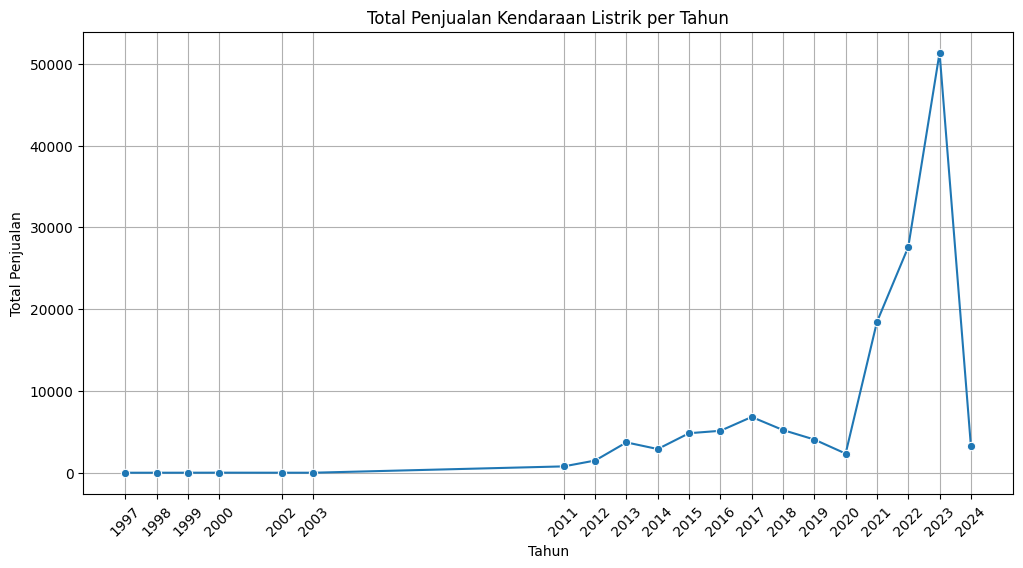

In [ ]:
# Visualisasi Total Penjualan per Tahun
plt.figure(figsize=(12, 6))
sns.lineplot(data=total_sales_per_year, x='Model Year', y='Total Sales', marker='o')
plt.title('Total Penjualan Kendaraan Listrik per Tahun')
plt.xlabel('Tahun')
plt.ylabel('Total Penjualan')
plt.xticks(total_sales_per_year['Model Year'], rotation=45)
plt.grid()
plt.show()

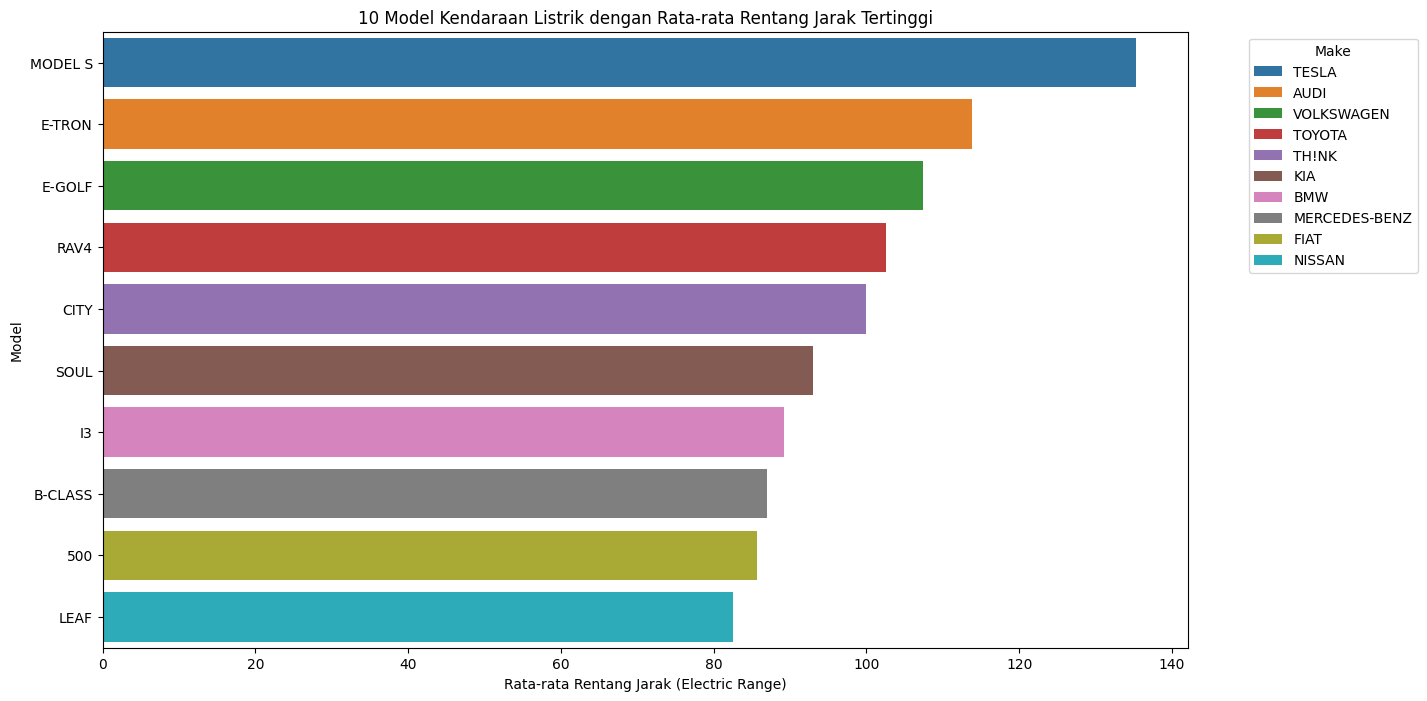

In [ ]:
# Visualisasi Rata-rata Rentang Jarak per Model
plt.figure(figsize=(14, 8))
top_range_models = average_range_per_model.sort_values(by='Average Electric Range', ascending=False).head(10)
sns.barplot(data=top_range_models, x='Average Electric Range', y='Model', hue='Make', dodge=False)
plt.title('10 Model Kendaraan Listrik dengan Rata-rata Rentang Jarak Tertinggi')
plt.xlabel('Rata-rata Rentang Jarak (Electric Range)')
plt.ylabel('Model')
plt.legend(title='Make', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

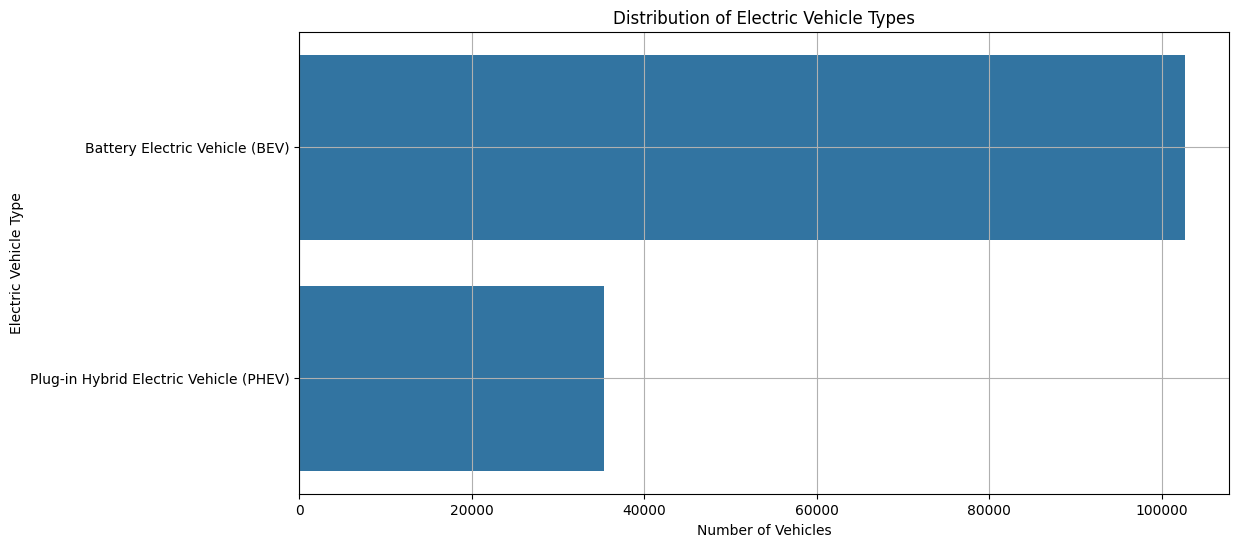

In [ ]:
# Visualisasi Distribusi Jenis Kendaraan Listrik
ev_type_count = df['Electric Vehicle Type'].value_counts().reset_index()
ev_type_count.columns = ['Electric Vehicle Type', 'Count']

plt.figure(figsize=(12, 6))
sns.barplot(data=ev_type_count, x='Count', y='Electric Vehicle Type')
plt.title('Distribution of Electric Vehicle Types')
plt.xlabel('Number of Vehicles')
plt.ylabel('Electric Vehicle Type')
plt.grid()
plt.show()

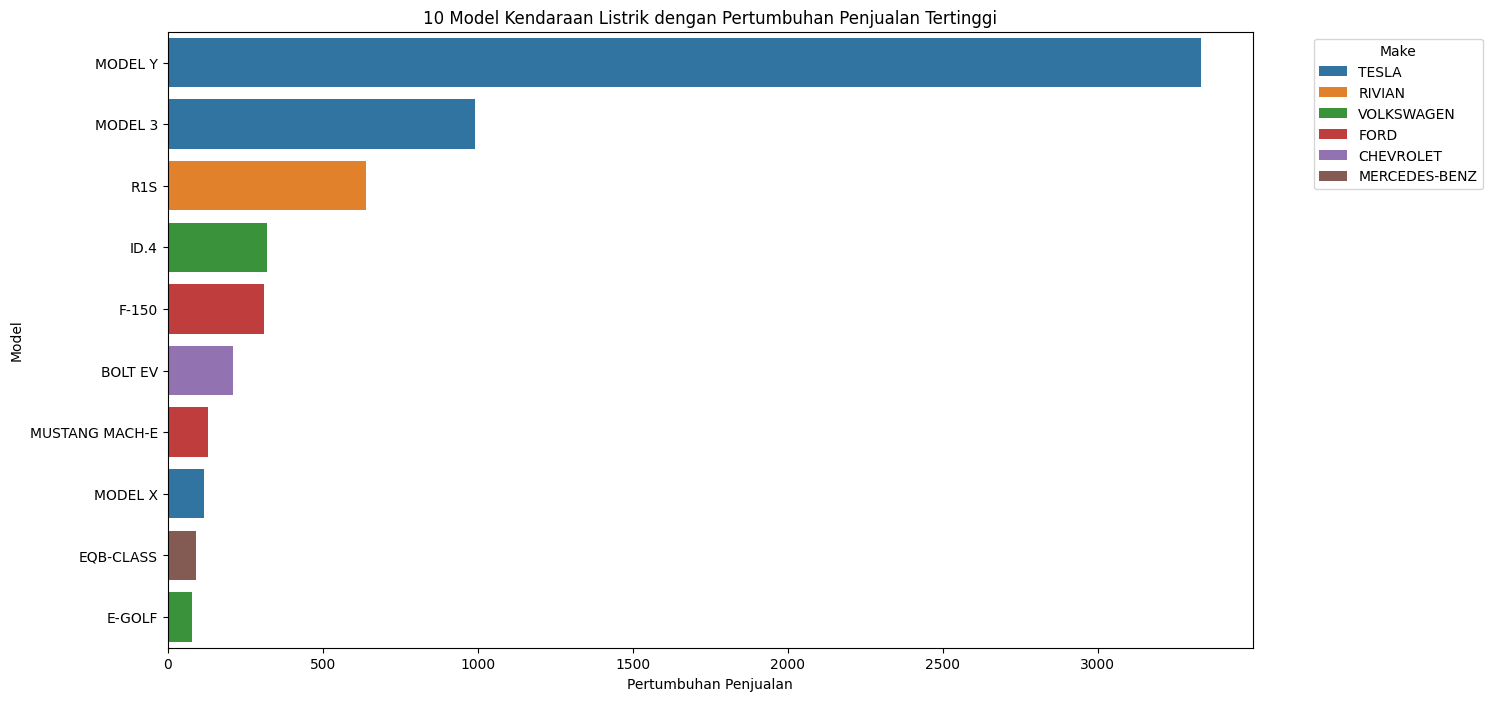

In [ ]:
# Visualisasi Pertumbuhan Penjualan per Model
plt.figure(figsize=(14, 8))
growth_models = sales_per_model_per_year.groupby(['Make', 'Model'])['Sales Growth'].mean().reset_index()
growth_models = growth_models[growth_models['Sales Growth'] > 0].sort_values(by='Sales Growth', ascending=False).head(10)
sns.barplot(data=growth_models, x='Sales Growth', y='Model', hue='Make', dodge=False)
plt.title('10 Model Kendaraan Listrik dengan Pertumbuhan Penjualan Tertinggi')
plt.xlabel('Pertumbuhan Penjualan')
plt.ylabel('Model')
plt.legend(title='Make', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


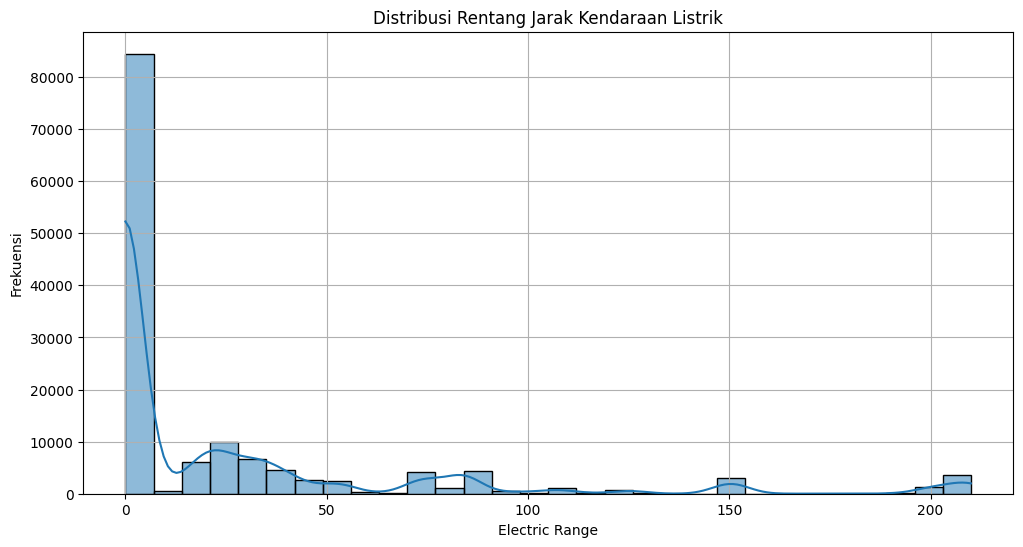

In [ ]:
# Visualisasi Distribusi Rentang Jarak
plt.figure(figsize=(12, 6))
sns.histplot(df['Electric Range'], bins=30, kde=True)
plt.title('Distribusi Rentang Jarak Kendaraan Listrik')
plt.xlabel('Electric Range')
plt.ylabel('Frekuensi')
plt.grid()
plt.show()

<ipython-input-14-80139b8bc9c9>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=city_count.head(10), x='Jumlah Kendaraan', y='City', palette='plasma')


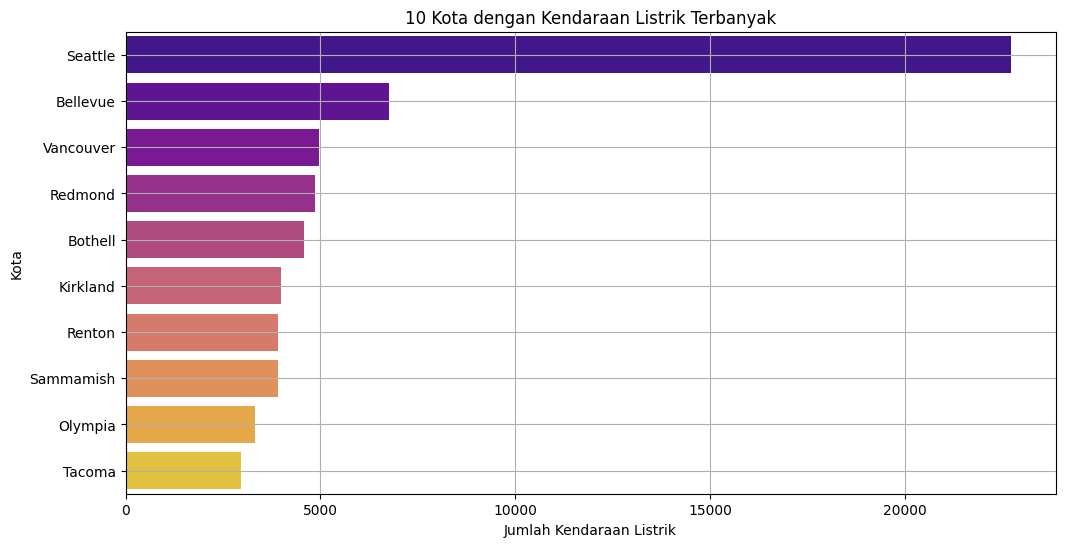

In [ ]:
# Visualisasi distribusi kendaraan listrik berdasarkan Kota
city_count = df['City'].value_counts().reset_index()
city_count.columns = ['City', 'Jumlah Kendaraan']

plt.figure(figsize=(12, 6))
sns.barplot(data=city_count.head(10), x='Jumlah Kendaraan', y='City', palette='plasma')
plt.title('10 Kota dengan Kendaraan Listrik Terbanyak')
plt.xlabel('Jumlah Kendaraan Listrik')
plt.ylabel('Kota')
plt.grid()
plt.show()

# Feature Engineering

In [ ]:
import pandas as pd
import numpy as np

# 1. Buat fitur baru: 'Price_per_Range'
df['Price_per_Range'] = df['Base MSRP'] / df['Electric Range']

# 2. Gabungkan 'City' dan 'State' menjadi fitur baru: 'Location'
df['Location'] = df['City'] + ', ' + df['State']

# 3. Ekstrak 'Vehicle Age' dari 'Model Year'
current_year = 2023
df['Vehicle_Age'] = current_year - df['Model Year']

# 4. Buat variabel dummy untuk fitur kategoris: 'Make', 'EV_Type'
df = pd.get_dummies(df, columns=['Make', 'Electric Vehicle Type'], drop_first=True)

# 5. Kelompokkan 'Electric Range' ke dalam kategori: 'Short', 'Medium', 'Long'
bins = [0, 100, 200, float('inf')]
labels = ['Short', 'Medium', 'Long']
df['Range_Category'] = pd.cut(df['Electric Range'], bins=bins, labels=labels)

# Menampilkan fitur yang direkayasa
print("\nData setelah Rekayasa Fitur:")
print(df.head(10))
print("Kolom dalam Dataset:\n", df.columns)


Data setelah Rekayasa Fitur:
    VIN (1-10)     County          City State Postal Code  Model Year  \
0   3C3CFFGE4E     Yakima        Yakima    WA      989020        2014   
1   5YJXCBE40H   Thurston       Olympia    WA      985130        2017   
2   3MW39FS03P       King        Renton    WA      980580        2023   
3   7PDSGABA8P  Snohomish       Bothell    WA      980120        2023   
5   5UX43EU02R     Kitsap       Poulsbo    WA      983700        2024   
6   2C4RC1H7XJ     Kitsap  Port Orchard    WA      983670        2018   
9   WBY7Z6C59J       King        Duvall    WA      980190        2018   
10  7SAYGDEE9P   Thurston       Olympia    WA      985020        2023   
13  3FA6P0SU9L     Kitsap     Bremerton    WA      983100        2020   
14  WBY1Z2C53G       King       Seattle    WA      981190        2016   

       Model  Clean Alternative Fuel Vehicle (CAFV) Eligibility  \
0        500            Clean Alternative Fuel Vehicle Eligible   
1    MODEL X            Clean Al

# Machine Learning

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Define the features and target variable
features = ['Model Year', 'Model', 'City']
target = 'Electric Range'

# Preprocessing
# Convert categorical features to numerical using Label Encoding
for feature in features: # Changed 'features' to 'feature' to iterate through list
    if df[feature].dtype == 'object':  # Check if feature is categorical
        le = LabelEncoder()
        df[feature] = le.fit_transform(df[feature]) # Changed 'features' to 'feature'

# Separate features and target variable
X = df[features]
y = df[target]

# Split the data into training and testing sets (70/30)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Further split training data into training and validation sets (e.g., 70/30 of training data)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.3, random_state=42)

# Scale numerical features using StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)


# Initialize and train models
models = {
    '=== Linear Regression ===': LinearRegression(),
    '=== Decision Tree ===': DecisionTreeRegressor(random_state=42),
    '=== Random Forest ===': RandomForestRegressor(random_state=42)
}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred_val = model.predict(X_val)
    mse_val = mean_squared_error(y_val, y_pred_val)
    r2_val = r2_score(y_val, y_pred_val)
    print(f'{name}:')
    print(f'  Mean Squared Error: {mse_val}')
    print(f'  R-squared: {r2_val}')

=== Linear Regression ===:
  Mean Squared Error: 1530.2791659166467
  R-squared: 0.3539381321632813
=== Decision Tree ===:
  Mean Squared Error: 48.905763157458594
  R-squared: 0.9793526897593475
=== Random Forest ===:
  Mean Squared Error: 40.91073409510568
  R-squared: 0.9827280761100716


### Pembagian data

In [ ]:
from sklearn.model_selection import train_test_split

# 1. Split into training and testing (70/30)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 2. Split training into training and validation (70/30 of training data)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.3, random_state=42)

# Display the shapes
print(f"Jumlah data training: {X_train.shape[0]}")
print(f"Jumlah data testing: {X_test.shape[0]}")
print(f"Jumlah data validation: {X_val.shape[0]}")

Jumlah data training: 67603
Jumlah data testing: 41390
Jumlah data validation: 28973


# EVALUASI

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error

# Inisialisasi dan latih model
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'Random Forest': RandomForestRegressor(random_state=42)
}

results = {}  # Untuk menyimpan hasil evaluasi

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))

    # Penanganan potensi pembagian dengan nol di MAPE
    mape = np.mean(np.abs((y_test - y_pred) / (y_test + 1e-10))) * 100

    results[name] = {'MAE': mae, 'RMSE': rmse, 'MAPE': mape}

    print(f'=== {name} ===:')
    print(f'  MAE: {mae}')
    print(f'  RMSE: {rmse}')
    print(f'  MAPE: {mape:.2f}%') # Format MAPE ke 2 tempat desimal
    print()

# Perbandingan Model
print('====================')
print('== Model Comparison ==\n')

best_model = min(results, key=lambda model: results[model]['RMSE'])  # Berdasarkan RMSE terendah

print(f"Best Model : {best_model}")
print()

for name, metrics in results.items():
    print(f'{name}:')
    print(f'  MAE: {metrics["MAE"]}')
    print(f'  RMSE: {metrics["RMSE"]}')
    print(f'  MAPE: {metrics["MAPE"]:.2f}%') # Format MAPE ke 2 tempat desimal

# Interpretasi
"""
print("\nInterpretasi:")
print("Nilai MAE, RMSE, dan MAPE yang lebih rendah menunjukkan kinerja model yang lebih baik.")
"""
print("MAE mewakili rata-rata selisih absolut antara nilai prediksi dan nilai aktual.")
print("RMSE lebih sensitif terhadap pencilan daripada MAE, memberikan penalti lebih besar pada kesalahan yang lebih besar.")
print("MAPE menyatakan rata-rata kesalahan persentase, berguna untuk membandingkan model di berbagai dataset dengan skala yang berbeda.")


=== Linear Regression ===:
  MAE: 22.615620425997115
  RMSE: 38.199310108838326
  MAPE: 6184280203183.68%

=== Decision Tree ===:
  MAE: 0.589695089368877
  RMSE: 6.306023936960495
  MAPE: 196171689681.17%

=== Random Forest ===:
  MAE: 0.5893287297748675
  RMSE: 5.791884522502283
  MAPE: 187492749444.82%

== Model Comparison ==

Best Model : Random Forest

Linear Regression:
  MAE: 22.615620425997115
  RMSE: 38.199310108838326
  MAPE: 6184280203183.68%

Decision Tree:
  MAE: 0.589695089368877
  RMSE: 6.306023936960495
  MAPE: 196171689681.17%

Random Forest:
  MAE: 0.5893287297748675
  RMSE: 5.791884522502283
  MAPE: 187492749444.82%

MAE mewakili rata-rata selisih absolut antara nilai prediksi dan nilai aktual.
RMSE lebih sensitif terhadap pencilan daripada MAE, memberikan penalti lebih besar pada kesalahan yang lebih besar.
MAPE menyatakan rata-rata kesalahan persentase, berguna untuk membandingkan model di berbagai dataset dengan skala yang berbeda.


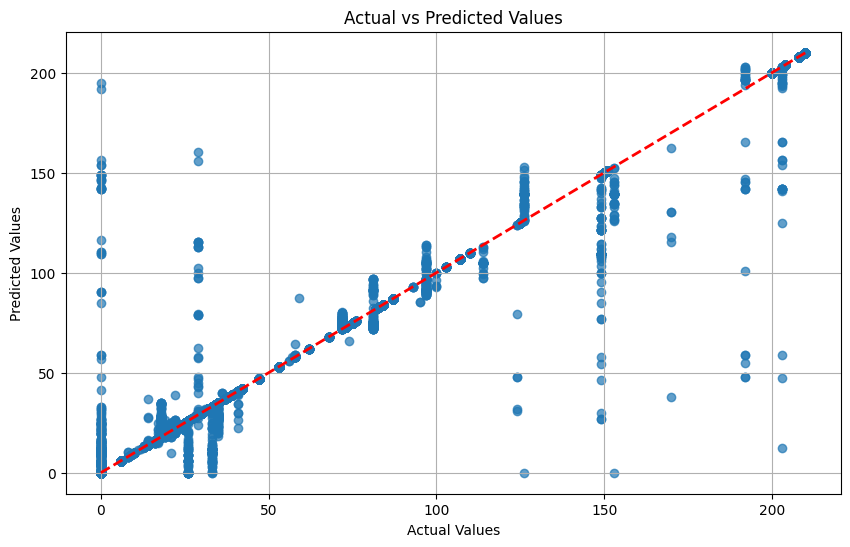

In [ ]:
# Visualisasikan prediksi vs nilai aktual
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)  # Diagonal line
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.grid()
plt.show()

### Interpretasi Grafik Perbandingan Nilai Aktual dan Prediksi

1. Sumbu X dan Y:
   - X (Nilai Aktual): Nilai yang sebenarnya.
   - Y (Nilai Prediksi): Nilai yang diprediksi oleh model.

2. Titik Data:
   - Titik biru mewakili observasi individu.

3. Garis Dashed Merah:
   - Garis ideal menunjukkan nilai aktual = nilai prediksi. Semakin dekat titik ke garis, semakin baik prediksi.

4. Distribusi Titik:
   - Kebanyakan titik dekat garis merah, menunjukkan performa baik pada nilai rendah hingga menengah. Beberapa titik jauh dari garis, khususnya pada nilai tinggi, menunjukkan potensi kesalahan prediksi. Tetapi pada gambar ini terbilang sudah cukup baik.

# Hyperparameter tuning

In [ ]:
from sklearn.model_selection import GridSearchCV

# Hyperparameter tuning for Decision Tree
param_grid_dt = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

dt_grid = GridSearchCV(DecisionTreeRegressor(random_state=42), param_grid_dt, cv=5, scoring='neg_mean_squared_error')
dt_grid.fit(X_train, y_train)
best_dt_model = dt_grid.best_estimator_
print(f"Best Decision Tree Hyperparameters: {dt_grid.best_params_}")


# Hyperparameter tuning for Random Forest
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

rf_grid = GridSearchCV(RandomForestRegressor(random_state=42), param_grid_rf, cv=5, scoring='neg_mean_squared_error')
rf_grid.fit(X_train, y_train)
best_rf_model = rf_grid.best_estimator_
print(f"Best Random Forest Hyperparameters: {rf_grid.best_params_}")

# Evaluate the best models
models = {
    'Decision Tree (tuned)': best_dt_model,
    'Random Forest (tuned)': best_rf_model
}

results = {}

for name, model in models.items():
    y_pred = model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mape = np.mean(np.abs((y_test - y_pred) / (y_test + 1e-10))) * 100
    results[name] = {'MAE': mae, 'RMSE': rmse, 'MAPE': mape}

    print(f'=== {name} ===:')
    print(f'  MAE: {mae}')
    print(f'  RMSE: {rmse}')
    print(f'  MAPE: {mape:.2f}%')
    print()

Best Decision Tree Hyperparameters: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 5}
Best Random Forest Hyperparameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}
=== Decision Tree (tuned) ===:
  MAE: 0.6989420434425472
  RMSE: 5.670343752503085
  MAPE: 190941310497.35%

=== Random Forest (tuned) ===:
  MAE: 0.7074923709723865
  RMSE: 5.257968868359252
  MAPE: 205831118419.93%



# Interpretasi Model Machine learning:

1. Linear Regression:
   - Mean Squared Error (MSE): 1530.28
     - Nilai MSE yang tinggi menunjukkan kesalahan prediksi yang besar, artinya model ini kurang akurat.
   - R-squared: 0.35
     - Nilai ini menunjukkan bahwa hanya 35% variasi dalam data yang dapat dijelaskan oleh model. Ini berarti model memiliki performa yang lemah.

2. Decision Tree:
   - Mean Squared Error (MSE): 48.91
     - MSE yang rendah menunjukkan prediksi yang jauh lebih akurat dibandingkan Linear Regression.
   - R-squared: 0.98
     - Nilai R-squared yang tinggi menunjukkan bahwa 98% variasi dalam data dapat dijelaskan oleh model. Ini menandakan performa yang sangat baik.

3. Random Forest:
   - Mean Squared Error (MSE): 40.91
     - MSE yang sedikit lebih rendah dari Decision Tree menunjukkan akurasi yang sangat baik dalam prediksi.
   - R-squared: 0.98
     - Nilai R-squared yang serupa dengan Decision Tree menunjukkan bahwa model ini juga sangat efektif dalam menjelaskan variasi dalam data.

### Kesimpulan:
- Decision Tree dan Random Forest memiliki performa jauh lebih baik dibandingkan Linear Regression dalam hal akurasi dan kemampuan menjelaskan variasi data.
- Disarankan untuk menggunakan **Decision Tree** atau **Random Forest** untuk prediksi yang lebih akurat.

# Interpretasi Evaluasi:

Tiga model, Linear Regression, Decision Tree, dan Random Forest, telah dievaluasi menggunakan MAE, RMSE, dan MAPE.

- MAE (Mean Absolute Error): Decision Tree dan Random Forest memiliki MAE yang jauh lebih rendah daripada Linear Regression (sekitar 0.59 vs 22.62). Ini menunjukkan bahwa model berbasis tree jauh lebih baik dalam memprediksi nilai absolut dalam kasus ini.

- RMSE (Root Mean Squared Error): Serupa dengan MAE, Decision Tree dan Random Forest memiliki RMSE yang lebih rendah daripada Linear Regression. Random Forest sedikit lebih baik daripada Decision Tree (5.79 vs 6.31). Ini menunjukkan Random Forest lebih baik dalam menangani error yang besar.

- MAPE (Mean Absolute Percentage Error): Ketiga model memiliki MAPE yang sangat tinggi, yang menandakan adanya nilai aktual yang mendekati atau sama dengan nol dalam data. MAPE tidak dapat diandalkan dalam situasi ini dan sebaiknya diabaikan.

## Rekomendasi:
Random Forest adalah model terbaik berdasarkan RMSE dan MAE yang lebih rendah dibandingkan Linear Regression dan Decision Tree. Abaikan MAPE karena nilainya terlalu tinggi. Selidiki dan atasi nilai aktual yang mendekati nol dalam data, dan pertimbangkan transformasi data atau metrik alternatif (MAPE, MAPE). Jika perlu, tuning hyperparameter dan lakukan cross-validation.

## Interpretasi hyperparameter tuning

Dua model, Decision Tree dan Random Forest, telah di-tuning (dioptimalkan) dan dievaluasi menggunakan MAE, RMSE, dan MAPE. Berikut interpretasinya:

MAE (Mean Absolute Error): Kedua model memiliki MAE yang sangat mirip, sekitar 0.7. Ini berarti rata-rata kesalahan absolut prediksi sekitar 0.7 unit. Seperti yang dijelaskan sebelumnya, interpretasi baik atau buruknya MAE bergantung pada skala data.
RMSE (Root Mean Squared Error): Random Forest memiliki RMSE yang sedikit lebih rendah daripada Decision Tree (5.26 vs 5.67). Ini menunjukkan bahwa Random Forest sedikit lebih baik dalam menangani error yang besar.
MAPE (Mean Absolute Percentage Error): Kedua model memiliki MAPE yang sangat tinggi, mengindikasikan adanya nilai aktual yang mendekati atau sama dengan nol dalam data. MAPE tidak dapat diandalkan dalam kasus ini dan sebaiknya diabaikan.